# House price prediction using Machine learning

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Reading the Data
Read in the HousePricePrediction.xlsx file and converting it into HousePricePredictioncsvfile.csv file 

In [2]:
df= pd.read_excel('HousePricePrediction.xlsx')
df.to_csv('HousePricePredictioncsvfile.csv', index=False)
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


** Using info and describe on df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


# Data preprocessing for changing categorical value into binary format
here used OrdinalEncoder method for sklearn preprocessing library

In [5]:
from sklearn.preprocessing import OrdinalEncoder
df['MSZoning'] = df['MSZoning'].replace('C(all)', 'C')
encoder = OrdinalEncoder(categories='auto')
df[['MSZoning']] = encoder.fit_transform(df[['MSZoning']])
df[['LotConfig']] = encoder.fit_transform(df[['LotConfig']])
df[['BldgType']] = encoder.fit_transform(df[['BldgType']])
df[['Exterior1st']] = encoder.fit_transform(df[['Exterior1st']])
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.0
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.0
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.0
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.0
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.0


# Checking whether missing values are present or not

In [6]:
missing_values=df.isnull().sum()
missing_values


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

# Filling the null values in MSZoning

In [7]:
mode_MSZoning = df['MSZoning'].mode()[0]
df['MSZoning'] = df['MSZoning'].fillna(mode_MSZoning)

(df['MSZoning'].isnull()).value_counts()   

False    2919
Name: MSZoning, dtype: int64

# Filling the null values in Exterior1st

In [8]:
mode_value = df["Exterior1st"].mode()[0]
df['Exterior1st'] = df['Exterior1st'].fillna(mode_value)
print((df['Exterior1st'].isnull()).value_counts())


False    2919
Name: Exterior1st, dtype: int64


# Filling the null values in BsmtFinSF2

In [9]:
mode_value = df['BsmtFinSF2'].mode()[0]
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
print((df['BsmtFinSF2'].isnull()).value_counts())


False    2919
Name: BsmtFinSF2, dtype: int64


# Filling the null values in TotalBsmtSF

In [10]:
mode_value = df['TotalBsmtSF'].mode()[0]
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
print((df['TotalBsmtSF'].isnull()).value_counts())


False    2919
Name: TotalBsmtSF, dtype: int64


# Predict missing values

In [11]:
df_missing = df[df['SalePrice'].isnull()]
df_not_missing = df.dropna()

In [12]:
X_train = df_not_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
y_train = df_not_missing['SalePrice']

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
X_missing = df_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
predicted_values = model.predict(X_missing)
df.loc[df['SalePrice'].isnull(), 'SalePrice'] = predicted_values
print(df)

        Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0        0          60       3.0     8450        4.0       0.0            5   
1        1          20       3.0     9600        2.0       0.0            8   
2        2          60       3.0    11250        4.0       0.0            5   
3        3          70       3.0     9550        0.0       0.0            5   
4        4          60       3.0    14260        2.0       0.0            5   
...    ...         ...       ...      ...        ...       ...          ...   
2914  2914         160       4.0     1936        4.0       3.0            7   
2915  2915         160       4.0     1894        4.0       4.0            5   
2916  2916          20       3.0    20000        4.0       0.0            7   
2917  2917          85       3.0    10441        4.0       0.0            5   
2918  2918          60       3.0     9627        4.0       0.0            5   

      YearBuilt  YearRemodAdd  Exterior1st  BsmtFin

In [15]:
new_df = df
new_df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.000000
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.000000
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.000000
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.000000
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,4.0,1936,4.0,3.0,7,1970,1970,5.0,0.0,546.0,142700.577433
2915,2915,160,4.0,1894,4.0,4.0,5,1970,1970,5.0,0.0,546.0,142700.577433
2916,2916,20,3.0,20000,4.0,0.0,7,1960,1996,12.0,0.0,1224.0,190768.577460
2917,2917,85,3.0,10441,4.0,0.0,5,1992,1992,6.0,0.0,912.0,203738.713226


# Data visualization

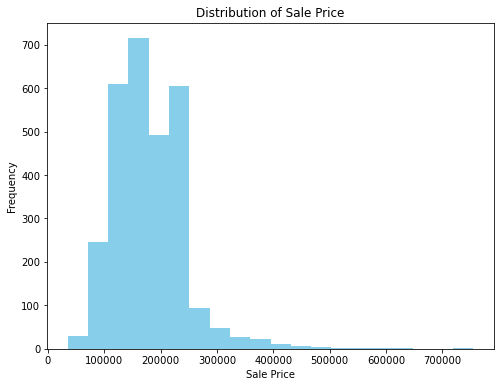

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['SalePrice'], bins=20, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

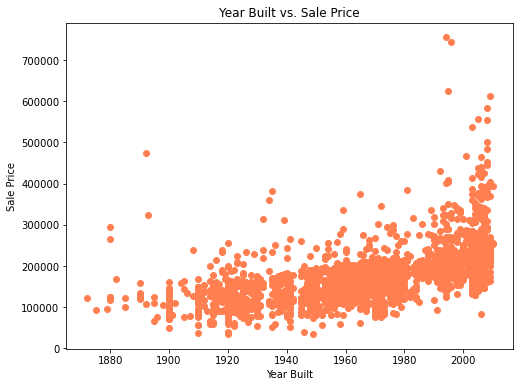

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'], color='coral')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Year Built vs. Sale Price')
plt.show()

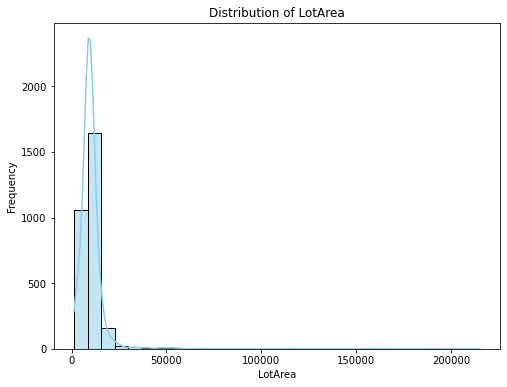

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LotArea'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

# Corelation Analysis

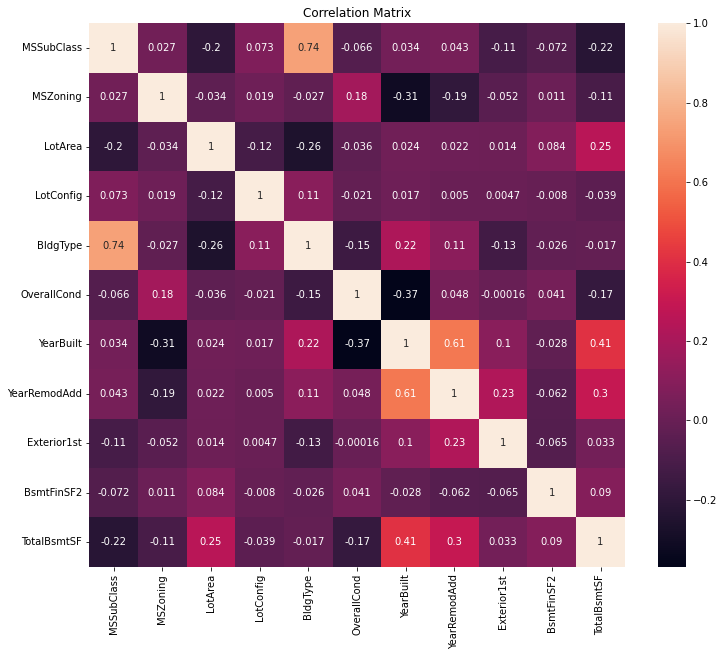

In [19]:
X = df[['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF']]
y = df['SalePrice']

plt.figure(figsize=(12,10))
cor = X.corr(method='pearson')
sns.heatmap(cor,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:
def correlation(data , threshold):
    corr_rel = set()
    C = data.corr()
    for i in range(len(C.columns)):
        for j in range(i):
            if abs(C.iloc[i,j]>threshold):
                col_name=C.columns[i]
                corr_rel.add(col_name)
    return corr_rel

feature = correlation(X , 0.2)
len(set(feature))
print(feature)

{'YearBuilt', 'Exterior1st', 'BldgType', 'YearRemodAdd', 'TotalBsmtSF'}


# Splitting the data into training and test sets

In [21]:
X = df[['Exterior1st', 'TotalBsmtSF', 'BldgType', 'YearBuilt', 'YearRemodAdd']]
y = df['SalePrice']

In [22]:
X_train , x_test , Y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [23]:
model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Prediction on test set

In [24]:
pred=model.predict(x_test)
pred

array([147129.14875557, 187742.46458682, 173622.32947249, 198024.25916374,
       222766.14754047, 264384.61135685, 100768.99102554, 195103.3770413 ,
        88239.59420058, 204977.04153801, 172001.39748218, 192470.14264317,
       150528.1478049 , 233095.12028547, 178466.58455954, 219309.29563369,
       146334.79582046, 206350.86739632,  93279.91377313, 137312.99061943,
       219651.97995112,  93407.1479463 , 103394.47990777, 217251.92852075,
       201683.63071959, 216167.23293571, 216068.18518697, 124826.59865576,
       210601.37623228, 138697.12140935, 259782.68294876, 157512.57020094,
       189252.99521883, 203279.92544512, 213375.1822456 , 245263.82084927,
       166518.32700334, 151396.45398333, 141299.89838638, 142551.45015377,
        93183.07723749, 208327.60780192, 258331.27619862, 166163.4056563 ,
       173037.21806627, 201667.61533408, 214779.59212596, 182624.60478219,
       178125.97059913, 195172.95084391, 112150.91228877, 189494.27037577,
       107438.8347263 , 2

# Evaluate model performance

In [25]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

mse_train = mean_squared_error(Y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(Y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE) - Train:", mse_train)
print("Mean Squared Error (MSE) - Test:", mse_test)
print("R-squared (R2) - Train:", r2_train)
print("R-squared (R2) - Test:", r2_test)



Mean Squared Error (MSE) - Train: 1711688111.2734203
Mean Squared Error (MSE) - Test: 1834141921.298216
R-squared (R2) - Train: 0.5916694314020137
R-squared (R2) - Test: 0.6105520943768766
